# Introduction to Neural Networks:

## Author:
### [Dr. Rahul Remanan](https://www.linkedin.com/in/rahulremanan)

### CEO, [Moad Computer](https://www.moad.computer)



This is a hands-on workshop notebook on deep-learning using python 3. In this notebook, we will learn how to implement a neural network from scratch using numpy. Once we have implemented this network, we will visualize the predictions generated by the neural network and compare it with a logistic regression model, in the form of classification boundaries. This workshop aims to provide an intuitive understanding of neural networks.

In practical code development, there is seldom an use case for building a neural network from scratch. Neural networks in real-world are typically implemented using a deep-learning framework such as tensorflow. But, building a neural network with very minimal dependencies helps one gain an understanding of how neural networks work. This understanding is essential to designing effective neural network models. Also, towards the end of the session, we will use tensorflow deep-learning library to build a neural network, to illustrate the importance of building a neural network using a deep-learning framework.

### Architecture of the basic XOR gate neural network:

![Artificial neural network architecture](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/Artificial_neural_network.png)

### XOR gate problem and neural networks -- Background:

[The XOR gate is an interesting problem in neural networks](http://www.ece.utep.edu/research/webfuzzy/docs/kk-thesis/kk-thesis-html/node19.html). [Marvin Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky) and [Samuel Papert](https://en.wikipedia.org/wiki/Seymour_Papert) in their book [ 'Perceptrons' (1969)](https://en.wikipedia.org/wiki/Perceptrons_(book) showed that the XOR gate cannot be solved using a two layer perceptron, since the solution for a XOR gate was not linearly separable. This conclusion lead to a significantly reduced interest in[ Frank Rosenblatt's](https://en.wikipedia.org/wiki/Frank_Rosenblatt) perceptrons as a mechanism for building artificial intelligence applications.

Some of these earliest work in AI were using networks or circuits of connected units to simulate intelligent behavior. Examples of this kind of work are called "connectionism". [After the publication of 'Perceptrons', the interest in connectionism significantly reduced](https://en.wikipedia.org/wiki/AI_winter#The_abandonment_of_connectionism_in_1969), till the renewed interest following the works of [John Hopfield](https://en.wikipedia.org/wiki/John_Hopfield) and [David Rumelhart](https://en.wikipedia.org/wiki/David_Rumelhart).

The assertions in the book 'Perceptrons' by Minsky was inspite of his thorough knowledge that the powerful perceptrons have multiple layers and that Rosenblatt's basic feed-forward perceptrons have three layers. In the book, to deceive unsuspecting readers, Minsky defined a perceptron as a two-layer machine that can handle only linearly separable problems and, for example, cannot solve the exclusive-OR problem. [The Minsky-Papert collaboation is now believed to be a political maneuver and a hatchet job for contract funding by some knowledgeable scientists](http://csis.pace.edu/~ctappert/srd2011/rosenblatt-contributions.htm). This strong, unidimensional and misplaced criticism of perceptrons essentially halted work on practical, powerful artificial intelligence systems that were based on neural-networks for nearly a decade.

Part 1 of this notebook explains how to build a very basic neural network in numpy. This perceptron like neural network is trained to predict the output of a [XOR gate](https://en.wikipedia.org/wiki/XOR_gate).

![CMOS XOR Gate](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/CMOS_XOR_Gate.png)

#### XOR gate table:

![XOR Gate Table](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/XOR_Gate_Table.png)

#### Image below shows an example of a lienarly separable dataset:

![Linearly separable points](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/linearly_spearable_points.gif)

#### Image below shows the XOR gate problem and no linear separation:

![XOR problem](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/XOR_gate.gif)


# Mathematical intuition of machine learning

Consider an input matrix with the entire training data, represented as set **_X_** and the corresponding labels, represented as set **_Y_**. 

An ideal machine learning model can be defined as a special type of [surjective function](https://en.wikipedia.org/wiki/Surjective_function) that maps the set **_X_**, which contains all the input elements **__x__**; to the set **_Y_**, which contains all the label elements **__y__**.

$$f: X \rightarrow Y$$
$${where}$$
$$\forall x \in X,\hspace{1em}\exists \forall y \in Y\hspace{1em}  \mid\hspace{1em}f(x) = y$$

$${For\hspace{0.5em}all}\hspace{1em}x \in X,\hspace{1em}there\hspace{0.5em}exists\hspace{0.5em}{for\hspace{0.5em}all}\hspace{1em}y \in Y;\hspace{1em}{a\hspace{0.5em}function\hspace{0.5em}such\hspace{0.5em}that:}\hspace{1em} f(x) = y$$.

An important result from the surjective function based definition of machine learning is that, they are not true universal function approximators; since the universe of all the mathematical operations cannot be expressed as a surjective function, due to [Cantor's paradox](https://en.wikipedia.org/wiki/Cantor%27s_paradox). 

Due to the very high effectiveness of machine learning models in approximating a variety of practical problems, they are understandably mischaracterized as universal function approximators.

But, from a practical stand-point; machine learning models do not have to satisfy the criteria of a true universal function approximator, to be useful. 

Since the most commonly encountered phenomena in the universe can be treated as just a smaller subset of the universe of all the mathematical operations, machine learning models can be applied to approximate these phenomena very successfully. 

Therefore, machine learning models are highly effective quasi or pseudo universal function approximators; capable of solving most, but not all problems in the universe of all mathematical operations.


# [Dot product](https://en.wikipedia.org/wiki/Dot_product)

$$
\begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n} \\
a_{21} & a_{22} & ... & a_{2n} \\
... \\
a_{m1} & a_{m2} & ... & a_{mn} \\
\end{bmatrix}
̇
\begin{bmatrix}
b_{11} & b_{12} & ... & b_{1p} \\
b_{21} & b_{22} & ... & b_{2p} \\
... \\
b_{n1} & b_{n2} & ... & b_{np} \\
\end{bmatrix}
=\\
\begin{bmatrix}
\Sigma_{i=1}^na_{1i} \times b_{i1} & \Sigma_{i=1}^na_{1i} \times b_{i2} & ... & \Sigma_{i=1}^na_{1i} \times b_{ip} \\
\Sigma_{i=1}^na_{2i} \times b_{i1} & \Sigma_{i=1}^na_{2i} \times b_{i2} & ... & \Sigma_{i=1}^na_{2i} \times b_{ip} \\
... \\
\Sigma_{i=1}^na_{mi} \times b_{i1} & \Sigma_{i=1}^na_{mi} \times b_{i2} & ... & \Sigma_{i=1}^na_{mi} \times b_{ip} \\
\end{bmatrix}
$$

# [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))

$$
\begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n} \\
a_{21} & a_{22} & ... & a_{2n} \\
... \\
a_{m1} & a_{m2} & ... & a_{mn} \\
\end{bmatrix}
⊙
\begin{bmatrix}
b_{11} & b_{12} & ... & b_{1n} \\
b_{21} & b_{22} & ... & b_{2n} \\
... \\
b_{m1} & b_{m2} & ... & b_{mn} \\
\end{bmatrix}
=\\
\begin{bmatrix}
(a_{11})(b_{11}) & (a_{12})(b_{12}) & ... & (a_{1n})(b_{1n}) \\
(a_{21})(b_{21}) & (a_{22})(b_{22}) & ... & (a_{2n})(b_{2n}) \\
... \\
(a_{m1})(b_{m1}) & (a_{m2})(b_{m2}) & ... & (a_{mn})(b_{mn}) \\
\end{bmatrix}
$$

# [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm)

$$\|(a_1, a_2, ... ,a_n ) \|=\sqrt{a_1^2+a_2^2+..+a_n^2}$$

## Part 01a -- Simple neural network as XOR gate using sigmoid activation function:


The XOR gate neural network implemention uses a two layer perceptron with sigmoid activation function. This portion of the notebook is a modified fork of the [neural network implementation in numpy by Milo Harper](https://github.com/miloharper/simple-neural-network).

### Import the dependent libraries -- numpy and matplotlib:


In [1]:
import random, numpy as np, matplotlib.pyplot as plt

### Create [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function):

- The sigmoid function takes two input arguments: x and a boolean argument called 'derivative'.
- When the boolean argument is set as true, the sigmoid function calculates the derivative of x.
- The derivative of x is required when calculating error or performing back-propagation.
- The sigmoid function runs in every single neuron.
- The sigmoid funtion feeds forward the data by converting the numeric matrices to probablities.

To implement the [logistic sigmoid function using numpy](https://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python), we use the mathematical formula:

[$$
  F(x) = \frac{1}{1+e^{-x}}
$$](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/sigmoid_function_formula.png)

### [Backpropagation](https://en.wikipedia.org/wiki/Backpropagation):

- Method to make the network better.
- [Mathematically we need to compute the derivative of the activation function](https://www.coursera.org/learn/neural-networks-deep-learning/lecture/6dDj7/backpropagation-intuition-optional).

#### If sigmoid function can be expressed as follows:

$g_{logistic}(z) = \frac{1}{1+e^{-z}}$

#### Then, the first [derivative](https://en.wikipedia.org/wiki/Derivative) of this function can be expressed as:

![backpropagation](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/derivative_of_sigmoid.png)

### Forward pass and backpropagation functions using sigmoid activation:

### Implementing sigmoid function using math library in python:

In [2]:
import math
x  = -1.2
y = 1/(1+math.exp(-x))
print (y)

0.23147521650098238


In [3]:
import numpy as np
y = 1/(1+np.exp(-x))
print (y)

0.23147521650098238


In [4]:
def sigmoid(x, derivative=False):
    '''
    Parameters:
      x: input
      derivative: boolean to specify if the derivative of the function should be computed
    '''
    if derivative:
        return (x*(1-x))
    return (1/(1+np.exp(-x)))

In [5]:
def ReLU(x, derivative=False):
  if derivative:
      return np.where(x < 0, 0, 1)
  x_relu = np.maximum(x, 0)
  return x_relu

In [6]:
sigmoid(-1.2, derivative=False)

np.float64(0.23147521650098238)

In [7]:
x = -1.2
y_d = (1/(1+np.exp(x)))*(1-(1/(1+np.exp(x))))

In [8]:
y_d

np.float64(0.17789444064680576)

In [9]:
sigmoid(0.23147521650098238, derivative=True)

0.1778944406468057

### Plotting sigmoid activation function:



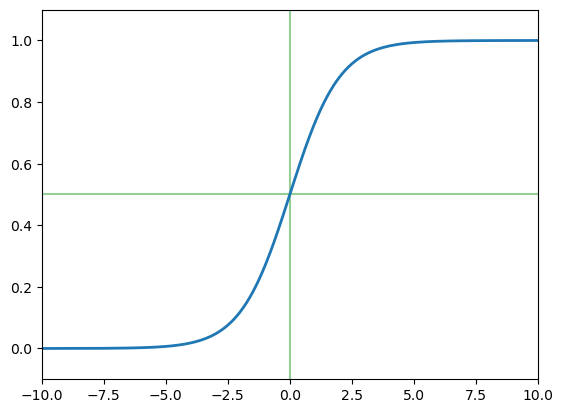

In [10]:
xmin= -10
xmax = 10
ymin = -0.1
ymax = 1.1
step_size = 0.01

x = list(np.arange(xmin, xmax, step_size))
y = []
for i in x:
  y_i = sigmoid(i)
  y.append(y_i)


axis = [xmin, xmax, ymin, ymax]
plt.axhline(y=0.5, color='C2', alpha=0.5)
plt.axvline(x=0, color='C2', alpha=0.5)
plt.axis(axis)
plt.plot(x, y, linewidth=2.0)

### Create an input data matrix as numpy array:
- Matrix with n number of dimensions.

In [11]:
import numpy as np

## Defining the input matrix
\begin{bmatrix}
0 & 0 \\
1 & 1 \\
1 & 0 \\
0 & 1
\end{bmatrix}

In [12]:
x = np.asarray([[0, 0],
                [1, 1],
                [1, 0],
                [0, 1]])

In [13]:
print('Shape of the input matrix: ', x.shape)

Shape of the input matrix:  (4, 2)


In [14]:
print('Number of rows: ', x.shape[0], 'Number of columns: ', x.shape[1])

Number of rows:  4 Number of columns:  2


## [For loop in Python](https://wiki.python.org/moin/ForLoop):

In [15]:
x_ = (1, 2, 3, 4)

In [16]:
len(x_)

4

In [17]:
for i in range(len(x_)):
    print ('This is the {} element in the tuple'.format(i))
    print ('The value is: {}'.format(x_[i]))

This is the 0 element in the tuple
The value is: 1
This is the 1 element in the tuple
The value is: 2
This is the 2 element in the tuple
The value is: 3
This is the 3 element in the tuple
The value is: 4


### Using ```enumerate```

In [18]:
for idx, i  in enumerate(x_):
    print (f'This is the {idx} element in the tuple')
    print (f'The value is: {i}')

This is the 0 element in the tuple
The value is: 1
This is the 1 element in the tuple
The value is: 2
This is the 2 element in the tuple
The value is: 3
This is the 3 element in the tuple
The value is: 4


## Define the output data matrix as numpy array:

\begin{bmatrix}
0 \\
0 \\
1 \\
1
\end{bmatrix}

In [19]:
y = np.asarray([[0],
                [0],
                [1],
                [1]])

In [20]:
y.shape

(4, 1)

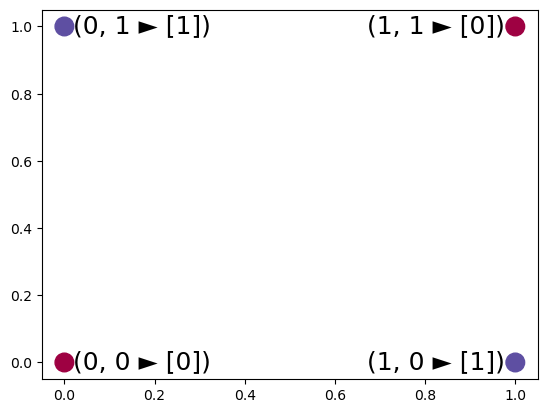

In [21]:
plt.scatter(x[:,0], x[:,1], s=180, c=y, cmap=plt.colormaps.get_cmap('Spectral'))
for i, (i_x, i_y) in enumerate(x):
    i_z = y[i]
    p_x, p_y = i_x, i_y
    if i_x == 1:
        p_x = i_x - 0.35
    plt.text(p_x + 0.02, p_y - 0.02, f'({i_x}, {i_y} ► {i_z})', fontsize=18)

## Define the neural network:
$$
f_n(\begin{bmatrix}
0 & 0 \\
1 & 1 \\
1 & 0 \\
0 & 1
\end{bmatrix})
\rightarrow
\begin{bmatrix}
0 \\
0 \\
1 \\
1
\end{bmatrix}
$$

### Create a random number seed:

- Random number seeding is useful for producing reproducible results.

In [22]:
seed = 1
np.random.seed(seed)

### Create a synapse matrix:

- A function applied to the syanpses.
- For the first synapse, weights matrix of shape: input_shape_1 x input_shape_2 is created.
- For the second synapse, weights matrix of shape: input_shape_2 x output_dim is created.
-  This function also introduces the first hyper-parameter in neural network tuning called 'bias_val', which is the bias value for the synaptic function.

In [23]:
bias_val = 1

output_dim = 1

input_shape_1 = x.shape[1]
input_shape_2 = x.shape[0]

hidden_layer_size = 4 # 3 # 2 # 5 #

synapse_0 = 2*np.random.random((input_shape_1, hidden_layer_size)) - bias_val
synapse_1 = 2*np.random.random((hidden_layer_size, output_dim)) - bias_val

loss_col = []

In [24]:
print (synapse_0.shape)

(2, 4)


## Define the first synapse (synapse 0):

>
$$
Eg.\\
$$
$$
Synapse_0
→
\begin{bmatrix}
-0.16595599 & 0.44064899 & -0.99977125 & -0.39533485\\
-0.70648822 & -0.81532281 & -0.62747958 & -0.30887855
\end{bmatrix}
$$

In [25]:
synapse_0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855]])

In [26]:
print (synapse_1.shape)

(4, 1)


## Define the second synapse (synapse 1):

>
$$
Eg.\\
$$
$$
Synapse_1
→
\begin{bmatrix}
-0.20646505\\
0.07763347\\
-0.16161097\\
0.370439
\end{bmatrix}
$$

In [27]:
print (synapse_1)

[[-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]]


## **Implement a single forward pass of the XOR input table**

### Create the input layer (layer 0)

$$
layer_0 = \begin{bmatrix}
0 & 0 \\
1 & 1 \\
1 & 0 \\
0 & 1
\end{bmatrix}
$$

In [28]:
layer_0 = x

### Compute the dot product between layer 0 and synapse 0:
$$
Eg.\\
\begin{bmatrix}
0 & 0 \\
1 & 1 \\
1 & 0 \\
0 & 1
\end{bmatrix}
̇
\begin{bmatrix}
-0.16595599 & 0.44064899 & -0.99977125 & -0.39533485\\
-0.70648822 & -0.81532281 & -0.62747958 & -0.30887855
\end{bmatrix}
=\\
\begin{bmatrix}
0 & 0 & 0 & 0 \\
-0.87244421 & -0.37467382 & -1.62725083 & -0.7042134 \\
-0.16595599  & 0.44064899 & -0.99977125 & -0.39533485 \\
-0.70648822 & -0.81532281 & -0.62747958 & -0.30887855 \\
\end{bmatrix}
$$

In [29]:
dot_product_0 = np.dot(layer_0, synapse_0)

In [30]:
print(dot_product_0)

[[ 0.          0.          0.          0.        ]
 [-0.87244421 -0.37467382 -1.62725083 -0.7042134 ]
 [-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]]


### Apply bias value for dot product 0:

$$
Eg. \\
bias {\space} value_0 = 1 \\
\begin{bmatrix}
0 & 0 & 0 & 0 \\
-0.87244421  & -0.37467382 & -1.62725083 & -0.7042134 \\
-0.16595599  & 0.44064899  & -0.99977125 & -0.39533485 \\
-0.70648822  & -0.81532281 & -0.62747958 & -0.30887855 \\
\end{bmatrix}
- bias {\space} value_0 =\\
\begin{bmatrix}
-1.          & -1.         & -1.         & -1.        \\
 -1.87244421 & -1.37467382 & -2.62725083 & -1.7042134 \\
 -1.16595599 & -0.55935101 & -1.99977125 & -1.39533485\\
 -1.70648822 & -1.81532281 & -1.62747958 & -1.30887855 \\
\end{bmatrix}
$$

In [31]:
bias_val_0 = 1
dot_product_0 = dot_product_0 - bias_val_0

In [32]:
print(dot_product_0)

[[-1.         -1.         -1.         -1.        ]
 [-1.87244421 -1.37467382 -2.62725083 -1.7042134 ]
 [-1.16595599 -0.55935101 -1.99977125 -1.39533485]
 [-1.70648822 -1.81532281 -1.62747958 -1.30887855]]


### Create layer 1 by applying the activation function to dot product 0:
$$
g_{logistic}(z) = \frac{1}{1+e^{-z}}\\
$$
$$
Eg.\\
g_{logistic}(
\begin{bmatrix}
0 & 0 & 0 & 0 \\
-0.87244421 & -0.37467382 & -1.62725083 & -0.7042134  \\
-0.16595599  & 0.44064899 & -0.99977125 & -0.39533485 \\
-0.70648822 & -0.81532281 & -0.62747958 & -0.30887855 \\
\end{bmatrix}) = \\
$$
$$
\begin{bmatrix}
0.26894142 & 0.26894142 & 0.26894142 & 0.26894142 \\
0.13325916 & 0.20186577 & 0.06740506 & 0.15391577 \\
0.23758674 & 0.36369764 & 0.11922694 & 0.19855744 \\
0.15361976 & 0.13999605 & 0.16417593 & 0.21267456 \\
\end{bmatrix}
$$

In [33]:
layer_1 = sigmoid(dot_product_0)

In [34]:
layer_1.shape

(4, 4)

In [35]:
print(layer_1)

[[0.26894142 0.26894142 0.26894142 0.26894142]
 [0.13325916 0.20186577 0.06740506 0.15391577]
 [0.23758674 0.36369764 0.11922694 0.19855744]
 [0.15361976 0.13999605 0.16417593 0.21267456]]


### Compute dot product between layer 1 and synapse 1
$$
Eg.\\
\begin{bmatrix}
0.26894142 & 0.26894142 & 0.26894142 & 0.26894142 \\
0.13325916 & 0.20186577 & 0.06740506 & 0.15391577 \\
0.23758674 & 0.36369764 & 0.11922694 & 0.19855744 \\
0.15361976 & 0.13999605 & 0.16417593 & 0.21267456 \\
\end{bmatrix}
̇
\begin{bmatrix}
-0.20646505\\
0.07763347\\
-0.16161097\\
0.370439
\end{bmatrix} = \\
\begin{bmatrix}
0.02151436 \\
0.03428119 \\
0.03346679 \\
0.03140159 \\
\end{bmatrix}
$$

In [36]:
dot_product_1 = np.dot(layer_1, synapse_1)

In [37]:
print(dot_product_1)

[[0.02151436]
 [0.03428119]
 [0.03346679]
 [0.03140159]]


### Apply bias value for the dot product 1
$$
Eg.\\
bias{\space}value_1= 1 \\
\begin{bmatrix}
0.02151436 \\
0.03428119 \\
0.03346679 \\
0.03140159 \\
\end{bmatrix}-bias{\space}value_1=\\
\begin{bmatrix}
-0.97848564\\
-0.96571881\\
-0.96653321\\
-0.96859841
\end{bmatrix}
$$

In [38]:
bias_val_1 = 1
dot_product_1 = dot_product_1 - bias_val_1

In [39]:
dot_product_1

array([[-0.97848564],
       [-0.96571881],
       [-0.96653321],
       [-0.96859841]])

### Create layer 2 by passing the dot product 2 through the activation function

$$
g_{logistic}(z) = \frac{1}{1+e^{-z}}\\
$$
$$
Eg.\\
g_{logistic}(\begin{bmatrix}
-0.97848564\\
-0.96571881\\
-0.96653321\\
-0.96859841
\end{bmatrix})=\\
\begin{bmatrix}
0.27319237\\
0.27573466\\
0.27557205\\
0.27515996
\end{bmatrix}
$$

In [40]:
layer_2 = sigmoid(dot_product_1)

In [41]:
layer_2.shape

(4, 1)

In [42]:
layer_2

array([[0.27319237],
       [0.27573466],
       [0.27557205],
       [0.27515996]])

# Part 01b -- [Backpropagation](https://en.wikipedia.org/wiki/Backpropagation)

This backpropagation example is a naive implmentation of the
$\frac{1}{2}$ of mean squared error as the loss function.

Therefore, the derivative of the loss function is computed first, which is:
$ (\frac{\partial E}{\partial o_j}) $:
$ \\
\frac{\partial E}{\partial o_j} = \frac{\partial }{\partial o_j} {\frac{1}{2}}(t-y)^2 {= y-t}
$

Layer delta is computed using:
$
\\
\Delta w_{ij} = -\eta \frac{\partial E}{\partial w_{ij}} $

In this implementation, learning rate ($\eta$) = 1


Read more by following the backpropogation link above.


## Implement a single backprop pass

### Compute the partial first derivative of the loss function:
$\frac{\partial }{\partial o_j} {\frac{1}{2}}(t-y)^2 {= y-t}$

In [43]:
output_loss_derivative = (layer_2 - y)

In [44]:
output_loss_derivative

array([[ 0.27319237],
       [ 0.27573466],
       [-0.72442795],
       [-0.72484004]])

### Compute the partial first derivative of the activation function for layer 2:
$g_{logistic}(z) = \frac{1}{1+e^{-z}} \\
g'_{logistic}(z) = g_{logistic}(z)(1 - g_{logistic}(z))$

Described in this notebook is the naive implementation for computing: $$g'_{logistic}(z)$$

It is defined as an extra function within the activation function, which is executed when the ```derivative``` flag is set to ```True```.

$$
Eg.\\
g'_{logistic}(
  \begin{bmatrix}
      0.27319237\\
      0.27573466\\
      0.27557205\\
      0.27515996
  \end{bmatrix})=\\
\begin{bmatrix}
    0.1985583\\
    0.19970506\\
    0.19963209\\
    0.19944695
\end{bmatrix}
$$

In [45]:
layer_2_derivative = sigmoid(layer_2, derivative=True)

In [46]:
print(layer_2_derivative)

[[0.1985583 ]
 [0.19970506]
 [0.19963209]
 [0.19944695]]


In [47]:
layer_2_delta = (output_loss_derivative * layer_2_derivative)

In [48]:
layer_2_delta

array([[ 0.05424461],
       [ 0.0550656 ],
       [-0.14461907],
       [-0.14456714]])

In [49]:
layer_1_error = (layer_2_delta.dot(synapse_1.T))

In [50]:
layer_1_error

array([[-0.01119962,  0.0042112 , -0.00876652,  0.02009432],
       [-0.01136912,  0.00427493, -0.00889921,  0.02039845],
       [ 0.02985878, -0.01122728,  0.02337203, -0.05357254],
       [ 0.02984806, -0.01122325,  0.02336364, -0.05355331]])

In [51]:
layer_1_delta = layer_1_error * sigmoid(layer_1, derivative=True)

In [52]:
layer_1_delta

array([[-0.00220198,  0.00082797, -0.0017236 ,  0.00395078],
       [-0.00131315,  0.00068876, -0.00055942,  0.0026564 ],
       [ 0.0054086 , -0.00259824,  0.00245434, -0.00852513],
       [ 0.00388087, -0.00135125,  0.00320601, -0.00896718]])

### Updating the weights/synapses of the neural network

In [53]:
synapse_1 += layer_1.T.dot(layer_2_delta)

In [54]:
synapse_1.shape

(4, 1)

In [55]:
synapse_0 += layer_0.T.dot(layer_1_delta)

In [56]:
synapse_0

array([[-0.16186054,  0.43873951, -0.99787633, -0.40120358],
       [-0.7039205 , -0.8159853 , -0.62483299, -0.31518933]])

## Part 01d -- Auto-differentiation

In [57]:
def stochastic_auto_differentiation(x, input_fn, epsilon, num_eval_steps=10):
    auto_diff_out = 0
    for i in range(num_eval_steps):
        fn_x = input_fn(x)

        rand_epsilon_a = random.SystemRandom().uniform(abs(epsilon), (abs(epsilon) / 100))
        rand_epsilon_b = random.SystemRandom().uniform(abs(epsilon), (abs(epsilon) / 100))

        x_a = x + rand_epsilon_a
        x_b = x + rand_epsilon_b

        x_delta = x_a - x_b
        
        fn_auto_diff_a = input_fn(x_a)
        fn_auto_diff_b = input_fn(x_b)

        auto_diff_out += (fn_auto_diff_a - fn_auto_diff_b) / x_delta
        auto_diff_out += (fn_auto_diff_a - fn_x)           / rand_epsilon_a
        auto_diff_out += (fn_auto_diff_b - fn_x)           / rand_epsilon_b

    auto_diff_out = auto_diff_out / (3 * num_eval_steps)

    return auto_diff_out

In [58]:
layer_2_derivative, layer_2

(array([[0.1985583 ],
        [0.19970506],
        [0.19963209],
        [0.19944695]]),
 array([[0.27319237],
        [0.27573466],
        [0.27557205],
        [0.27515996]]))

In [59]:
auto_diff_layer_2_derivative = stochastic_auto_differentiation(layer_2, sigmoid, 1e-8, 100)

In [60]:
auto_diff_layer_2_derivative

array([[0.24539277],
       [0.24530771],
       [0.2453132 ],
       [0.24532701]])

## Part 01e -- Training the simple XOR gate neural network:

- Note: There is no function that defines a neuron! In practice neuron is just an abstract concept to understand the probability function.
- Continuously feeding the data throught the neural network.
- Updating the weights of the network through backpropagation.
- During the training the model becomes better and better in predicting the output values.
- The layers are just matrix multiplication functions that apply the sigmoid function to the synapse matrix and the corresponding layer.
- Backpropagation portion of the training is the machine learning portion of this code.
- Backpropagation function reduces the prediction errors during each training step.
- Synapses and weights are synonymous.

In [61]:
training_steps = 500000
update_freq = 10

input_data, output_data = x, y

bias_val_1 = 1e-2
bias_val_2 = 0.2 # 1e-4 # 0.5 # 1 # 1e-3 # 10

learning_rate = 0.1 # 10 # 1 # 1e-3 # 1000 #

for t in range(training_steps):
    # Creating the layers of the neural network:
    layer_0 = input_data
    layer_1 = sigmoid(np.dot(layer_0, synapse_0) + bias_val_1)
    layer_2 = sigmoid(np.dot(layer_1, synapse_1) + bias_val_2)

    # Backpropagation:
    outputLoss_derivative = output_data - layer_2
    loss_col.append(np.mean(np.abs(outputLoss_derivative)))
    if ((t*update_freq) % training_steps == 0):
        print ('Training step :' + str(t))
        print ('Prediction error during training :' + str(np.mean(np.abs(outputLoss_derivative))))

    # Layer-wsie delta function:
    layer_2_delta = (learning_rate*outputLoss_derivative*sigmoid(layer_2, derivative=True))
    layer_1_error = layer_2_delta.dot(synapse_1.T) # Matrix multiplication of the layer 2 delta with the transpose of the first synapse function.
    layer_1_delta = (layer_1_error*learning_rate)*(sigmoid(layer_1, derivative=True))

    # Updating synapses or weights:
    synapse_1 += layer_1.T.dot(layer_2_delta)
    synapse_0 += layer_0.T.dot(layer_1_delta)
    del layer_0, layer_1

print ('Training completed ...')
print ('Predictions :' + str (layer_2))

Training step :0
Prediction error during training :0.49947865092201427
Training step :50000
Prediction error during training :0.039513444187206224
Training step :100000
Prediction error during training :0.022904166645165158
Training step :150000
Prediction error during training :0.017474222743701702
Training step :200000
Prediction error during training :0.01459838750079983
Training step :250000
Prediction error during training :0.01276174584050211
Training step :300000
Prediction error during training :0.01146361645264756
Training step :350000
Prediction error during training :0.010485586149640565
Training step :400000
Prediction error during training :0.009715578899547148
Training step :450000
Prediction error during training :0.009089530293717018
Training completed ...
Predictions :[[0.00878755]
 [0.00828587]
 [0.99126104]
 [0.99154085]]


In [62]:
layer_0 = input_data
layer_1 = sigmoid(np.dot(layer_0, synapse_0) + bias_val_1)
layer_2 = sigmoid(np.dot(layer_1, synapse_1) + bias_val_2)
print(synapse_0)
print('\n')
print(bias_val_1)
print('\n')
print(layer_1)
print('\n')
print(bias_val_2)
print('\n')
print(synapse_1)
print('\n')
print(layer_2)

[[ 1.96126503  3.44666561 -4.61097989 -2.07608376]
 [-4.34432392 -1.47596634 -4.59797239  0.7843017 ]]


0.01


[[5.02499979e-01 5.02499979e-01 5.02499979e-01 5.02499979e-01]
 [8.52502964e-02 8.78755685e-01 1.01135088e-04 2.17247030e-01]
 [8.77746925e-01 9.69429303e-01 9.94215185e-03 1.12437267e-01]
 [1.29410681e-02 1.87556485e-01 1.00710082e-02 6.88754243e-01]]


0.2


[[ 14.60690265]
 [ -9.37631859]
 [-24.29329342]
 [  9.26053281]]


[[0.00878755]
 [0.00828586]
 [0.99126104]
 [0.99154086]]


In [63]:
def xor_gate_predictor(x):
    layer_0 = x
    layer_1 = sigmoid(np.dot(layer_0, synapse_0) + bias_val_1)
    layer_2 = sigmoid(np.dot(layer_1, synapse_1) + bias_val_2)
    return layer_2

In [64]:
y.shape

(4, 1)

In [65]:
def plot_xor_gate_decision_boundary(prediction_function, x, y):
    # Setting minimum and maximum values for giving the plot function some padding
    x_min, x_max = x[:, 0].min() - .5, \
                  x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, \
                  x[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), \
                        np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = prediction_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plotting the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.colormaps.get_cmap('Spectral'))
    plt.scatter(x[:, 0], x[:, 1], c=y, s=42, cmap=plt.colormaps.get_cmap('Accent'))
    for i, (i_x, i_y) in enumerate(x):
        i_z = y[i]
        p_x, p_y = i_x - 0.25, i_y - 0.2
        #if i_x == 1:
        #    p_x = i_x - 0.25
        plt.text(p_x , p_y , f'({i_x}, {i_y} ► {i_z})', fontsize=18)

In [66]:
import sklearn, sklearn.datasets, sklearn.linear_model
X, Y = sklearn.datasets.make_moons(6, noise=0.20)

In [67]:
linear_classifier = sklearn.linear_model.LogisticRegression()
linear_classifier.fit(X, Y)

LogisticRegression()

Text(0.5, 1.0, 'Logistic Regression')

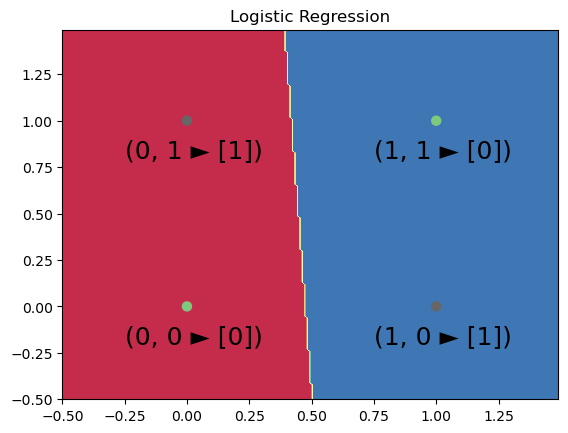

In [68]:
plot_xor_gate_decision_boundary(lambda x: linear_classifier.predict(x), x, y)
plt.title('Logistic Regression')

Text(0.5, 1.0, 'XOR gate neural network model')

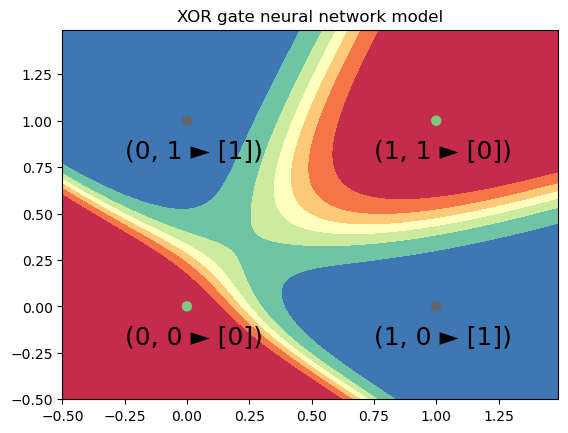

In [69]:
plot_xor_gate_decision_boundary(lambda x: xor_gate_predictor(x), x, y)
plt.title('XOR gate neural network model')

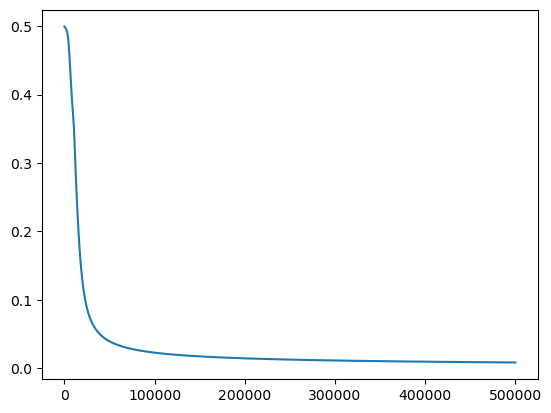

In [70]:
plt.plot(loss_col)
plt.show()

delete_model = True

if delete_model:
  try:
    del loss_col
  except:
    pass
  try:
    del input_data
  except:
    pass
  try:
    del output_data
  except:
    pass
  try:
    del x
  except:
    pass
  try:
    del y
  except:
    pass
  try:
    del layer_2
  except:
    pass
  try:
    del output_data
  except:
    pass
  try:
    del synapse_0
  except:
    pass
  try:
    del synapse_1
  except:
    pass
  import gc
  gc.collect()

## Part 01f -- Neural network based XOR gate using rectified linear units activation function:

In [71]:
import numpy as np
import matplotlib.pyplot as plt

### Plotting the rectified linear units (ReLU) activation function:

In [72]:
def ReLU(x, derivative=False):
  if derivative:
      return np.where(x < 0, 0, 1)
  x_relu = np.maximum(x, 0)
  return x_relu

def relu(x, derivative=False):
  return ReLU(x, derivative=derivative)

In [73]:
def relu_derivative(x, y):
    return np.array([x])[np.array([y])<0]

In [74]:
a = np.array([3])
a[np.array([-1])<0] = 0

In [75]:
print(a)

[0]


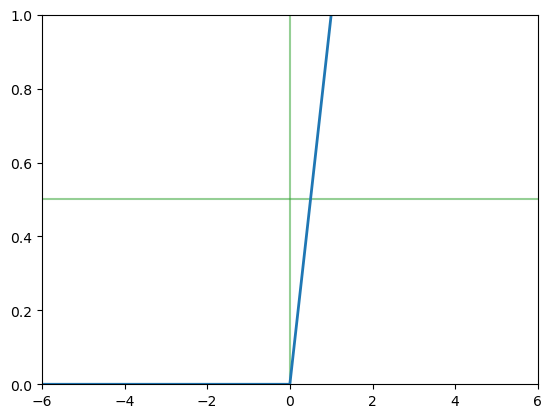

In [76]:
x = list(np.arange(-6.0, 6.0, 0.1))
y = []
for i in x:
  y_i = ReLU(i)
  y.append(y_i)

xmin= -6
xmax = 6
ymin = 0
ymax = 1
axis = [xmin, xmax, ymin, ymax]
plt.axhline(y=0.5, color='C2', alpha=0.5)
plt.axvline(x=0, color='C2', alpha=0.5)
plt.axis(axis)
plt.plot(x, y, linewidth=2.0)

### Create input and output data

In [77]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

### N is batch size(sample size); D_in is input dimension; H is hidden dimension; D_out is output dimension:

In [78]:
D_in, H, D_out = x.shape[1], 30, 1

### Randomly initialize weights:

In [79]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

In [80]:
learning_rate = 1e-3
update_freq = 10
training_steps = 2000

loss_col = []

### ReLu as the activation function and [squared error](https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error) as the loss function:

In [81]:
for t in range(training_steps):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)  # using ReLU as activation function
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum() # squared error as the loss function
    loss_col.append(loss)
    if ((t*update_freq) % training_steps ==0):
      print ('Training step :' + str(t))
      print ('Loss function during training :' + str(loss))
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2*(y_pred - y) # the last layer's error
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T) # the second layer's error
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0  # the derivate of ReLU
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

print ('Training completed ...')
print ('Predictions :' + str (y_pred))

Training step :0
Loss function during training :77.33953504048225
Training step :200
Loss function during training :0.0015854972315076641
Training step :400
Loss function during training :1.5891380426878565e-05
Training step :600
Loss function during training :1.5879212287382487e-07
Training step :800
Loss function during training :1.5866138725491209e-09
Training step :1000
Loss function during training :1.5848513031787068e-11
Training step :1200
Loss function during training :1.5830823576639678e-13
Training step :1400
Loss function during training :1.5813159181199234e-15
Training step :1600
Loss function during training :1.579639533734191e-17
Training step :1800
Loss function during training :1.578206185358613e-19
Training completed ...
Predictions :[[0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.12956319e-11]]


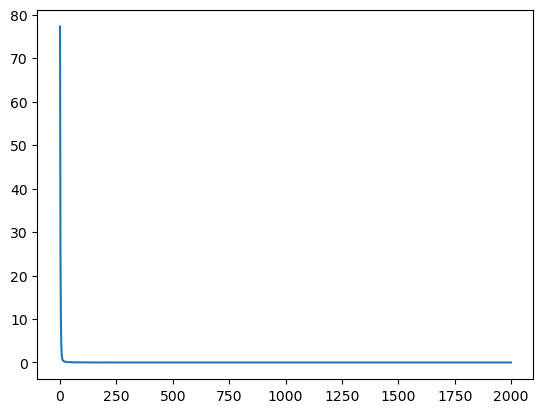

In [82]:
plt.plot(loss_col)
plt.show()

In [83]:
delete_model = True

if delete_model:
  try:
    del loss_col
  except:
    pass
  try:
    del input_data
  except:
    pass
  try:
    del output_data
  except:
    pass
  try:
    del x
  except:
    pass
  try:
    del y
  except:
    pass
  try:
    del output_data
  except:
    pass

  import gc
  gc.collect()

## Part 01g -- Training using stochastic auto-differentiation

In [84]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [85]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

In [86]:
training_steps = 500000
update_freq = 10

input_data, output_data = x, y

bias_val_1 = 1e-2
bias_val_2 = 0.2 
output_dim = 1

input_shape_1 = x.shape[1]
input_shape_2 = x.shape[0]

hidden_layer_size = 4

synapse_0 = 2 * np.random.random((input_shape_1, hidden_layer_size)) - bias_val
synapse_1 = 2 * np.random.random((hidden_layer_size, output_dim)) - bias_val

loss_col = []

learning_rate = 0.1

activation_fn = tanh # relu # sigmoid

for t in range(training_steps):
    layer_0 = input_data
    layer_1 = activation_fn(np.dot(layer_0, synapse_0) + bias_val_1)
    layer_2 = activation_fn(np.dot(layer_1, synapse_1) + bias_val_2)

    output_loss_derivative = output_data - layer_2
    loss_col.append(np.mean(np.abs(output_loss_derivative)))
    if ((t * update_freq) % training_steps == 0):
        print ('Training step :' + str(t))
        print ('Prediction error during training : ' + str(np.mean(np.abs(output_loss_derivative))))

    layer_2_delta = (learning_rate * output_loss_derivative * (stochastic_auto_differentiation(layer_2, activation_fn, 1e-8)))
    layer_1_error = layer_2_delta.dot(synapse_1.T)
    layer_1_delta = (layer_1_error * learning_rate) * (stochastic_auto_differentiation(layer_1, activation_fn, 1e-8))

    synapse_1 += layer_1.T.dot(layer_2_delta)
    synapse_0 += layer_0.T.dot(layer_1_delta)
    del layer_0, layer_1

print ('Training completed ...')
print ('Predictions : ' + str (layer_2))

Training step :0
Prediction error during training : 0.5444698206436022
Training step :50000
Prediction error during training : 0.05519276033200372
Training step :100000
Prediction error during training : 0.0645160339204435
Training step :150000
Prediction error during training : 0.0484862677772539
Training step :200000
Prediction error during training : 0.033285926163649254
Training step :250000
Prediction error during training : 0.022915820595350547
Training step :300000
Prediction error during training : 0.016459141797574323
Training step :350000
Prediction error during training : 0.012420628801204928
Training step :400000
Prediction error during training : 0.009817698071251608
Training step :450000
Prediction error during training : 0.008074896801074632
Training completed ...
Predictions : [[ 0.00556467]
 [ 0.99986256]
 [ 0.99978327]
 [-0.02139604]]


## Part 02 -- [Build a more complex neural network classifier using numpy](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/):

### Importing dependent libraries:

In [87]:
import matplotlib.pyplot as plt # pip3 install matplotlib
import numpy as np # pip3 install numpy
import sklearn # pip3 install scikit-learn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

### Plotting hyperbolic tan (tanh) activation function:

In [88]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

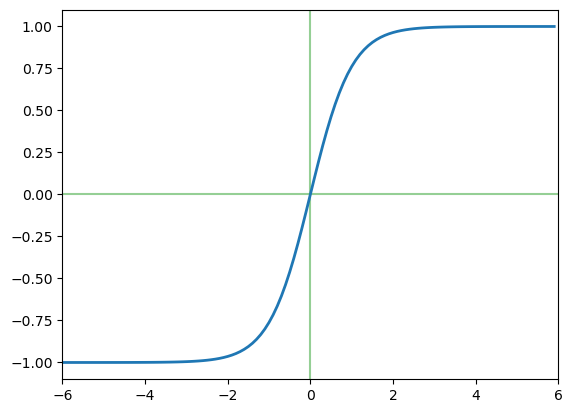

In [89]:
x = list(np.arange(-6.0, 6.0, 0.1))
y = []
for i in x:
    y_i = tanh(i)
    y.append(y_i)

xmin = -6
xmax =  6
ymin = -1.1
ymax = 1.1
axis = [xmin, xmax, ymin, ymax]
plt.axhline(y=0, color='C2', alpha=0.5)
plt.axvline(x=0, color='C2', alpha=0.5)
plt.axis(axis)
plt.plot(x, y, linewidth=2.0)

### Display plots inline and change default figure size:

In [90]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Generate a dataset and create a plot:

In [91]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### Train the logistic regression classifier:

The classification problem can be summarized as creating a boundary between the red and the blue dots.

In [92]:
linear_classifier = sklearn.linear_model.LogisticRegressionCV()
linear_classifier.fit(X, y)

LogisticRegressionCV()

### Visualize the logistic regression classifier output:

In [93]:
def plot_decision_boundary(prediction_function):
    # Setting minimum and maximum values for giving the plot function some padding
    x_min, x_max = X[:, 0].min() - .5, \
                   X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, \
                   X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), \
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = prediction_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plotting the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.colormaps.get_cmap("Spectral"))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.colormaps.get_cmap("Spectral"))

### Plotting the decision boundary:

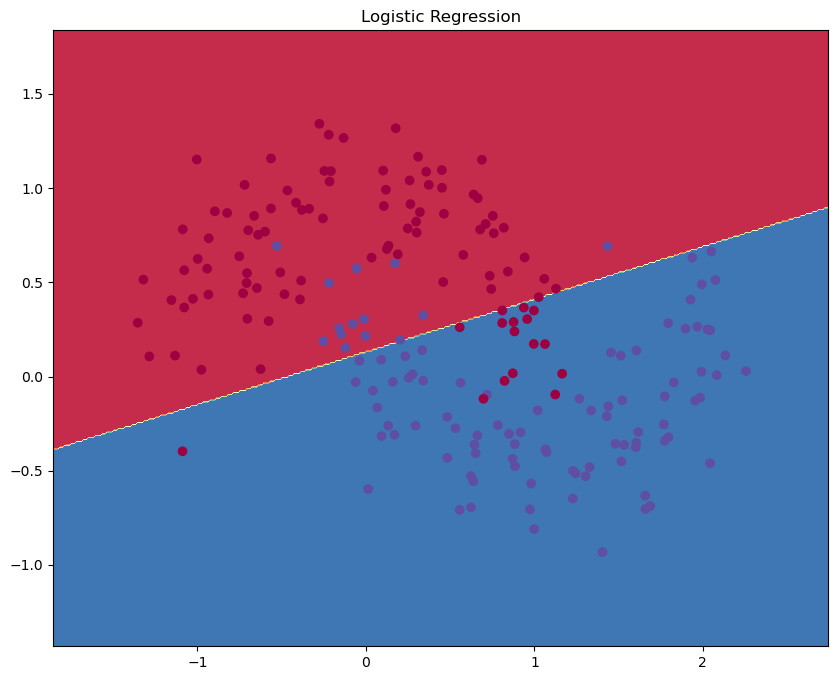

In [94]:
plot_decision_boundary(lambda x: linear_classifier.predict(x))
plt.title('Logistic Regression')
plt.show()

### Create a neural network:

In [95]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

### Gradient descent parameters:

In [96]:
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

### Function that predicts the output of either 0 or 1:

Forward pass across the model layers for creating the predictions

In [97]:
def forward_pass(model, x):
    W1, b1, W2, b2 = model['W1'], \
                     model['b1'], \
                     model['W2'], \
                     model['b2']
    # Design a network with forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=-1)

### Compute loss function on the dataset:

In [101]:
def loss_function(model, x, y, reg_lambda=0.01):
    W1, W2 = model['W1'],  model['W2']
    probabilities = forward_pass(model, x)
    num_examples = len(x)
    # Calculating the loss function
    corect_logprobs = -np.log(np.where(probabilities == y, 2, 1))
    data_loss = np.sum(corect_logprobs)
    # Adding the regulatization term to the loss function
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss


### This function learns parameters for the neural network and returns the model:
- nn_hdim: Number of nodes in the hidden layer
- num_passes: Number of passes through the training data for gradient descent
- print_loss: If True, print the loss every 1000 iterations

In [102]:
def build_model(nn_hdim):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # Assign new parameters to the model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

def train_model(X, y, model, num_passes=20000, print_loss=False):
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        model['W1'] = W1
        model['W2'] = W2
        model['b1'] = b1
        model['b2'] = b2

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, loss_function(model, X, y)))
    return model

### Build a model with 50-dimensional hidden layer:

In [103]:
model = build_model(50)
model = train_model(X, y, model, print_loss=True)

Loss after iteration 0: -0.542682
Loss after iteration 1000: -0.669951
Loss after iteration 2000: -0.671437
Loss after iteration 3000: -0.676596
Loss after iteration 4000: -0.671605
Loss after iteration 5000: -0.670349
Loss after iteration 6000: -0.672832
Loss after iteration 7000: -0.672125
Loss after iteration 8000: -0.671632
Loss after iteration 9000: -0.671292
Loss after iteration 10000: -0.671060
Loss after iteration 11000: -0.670904
Loss after iteration 12000: -0.670800
Loss after iteration 13000: -0.670732
Loss after iteration 14000: -0.670690
Loss after iteration 15000: -0.670665
Loss after iteration 16000: -0.670652
Loss after iteration 17000: -0.670647
Loss after iteration 18000: -0.670649
Loss after iteration 19000: -0.670657


### Plot the decision boundary:

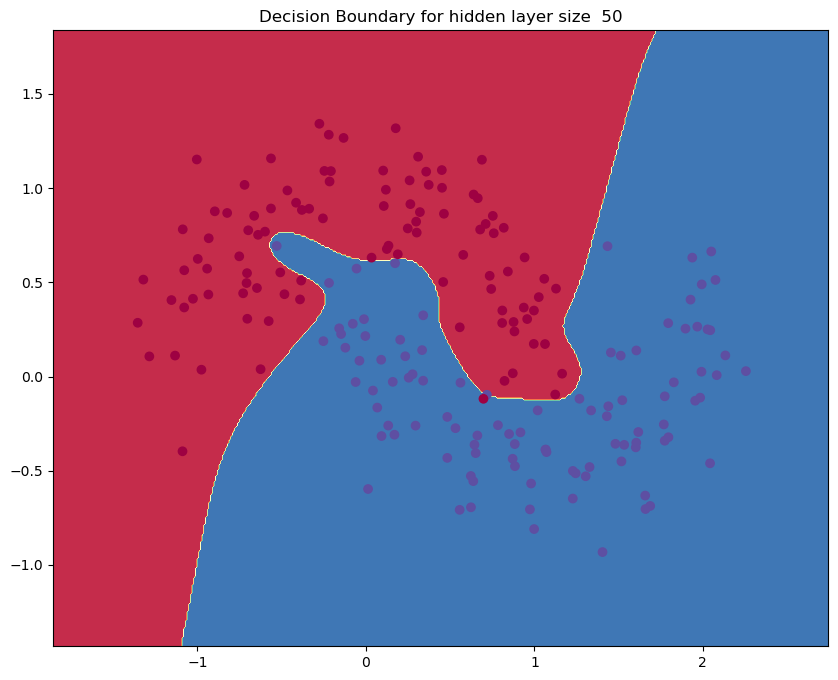

In [104]:
plot_decision_boundary(lambda x: forward_pass(model, x))
plt.title('Decision Boundary for hidden layer size  50')
plt.show()

### Visualizing the hidden layers with varying sizes:

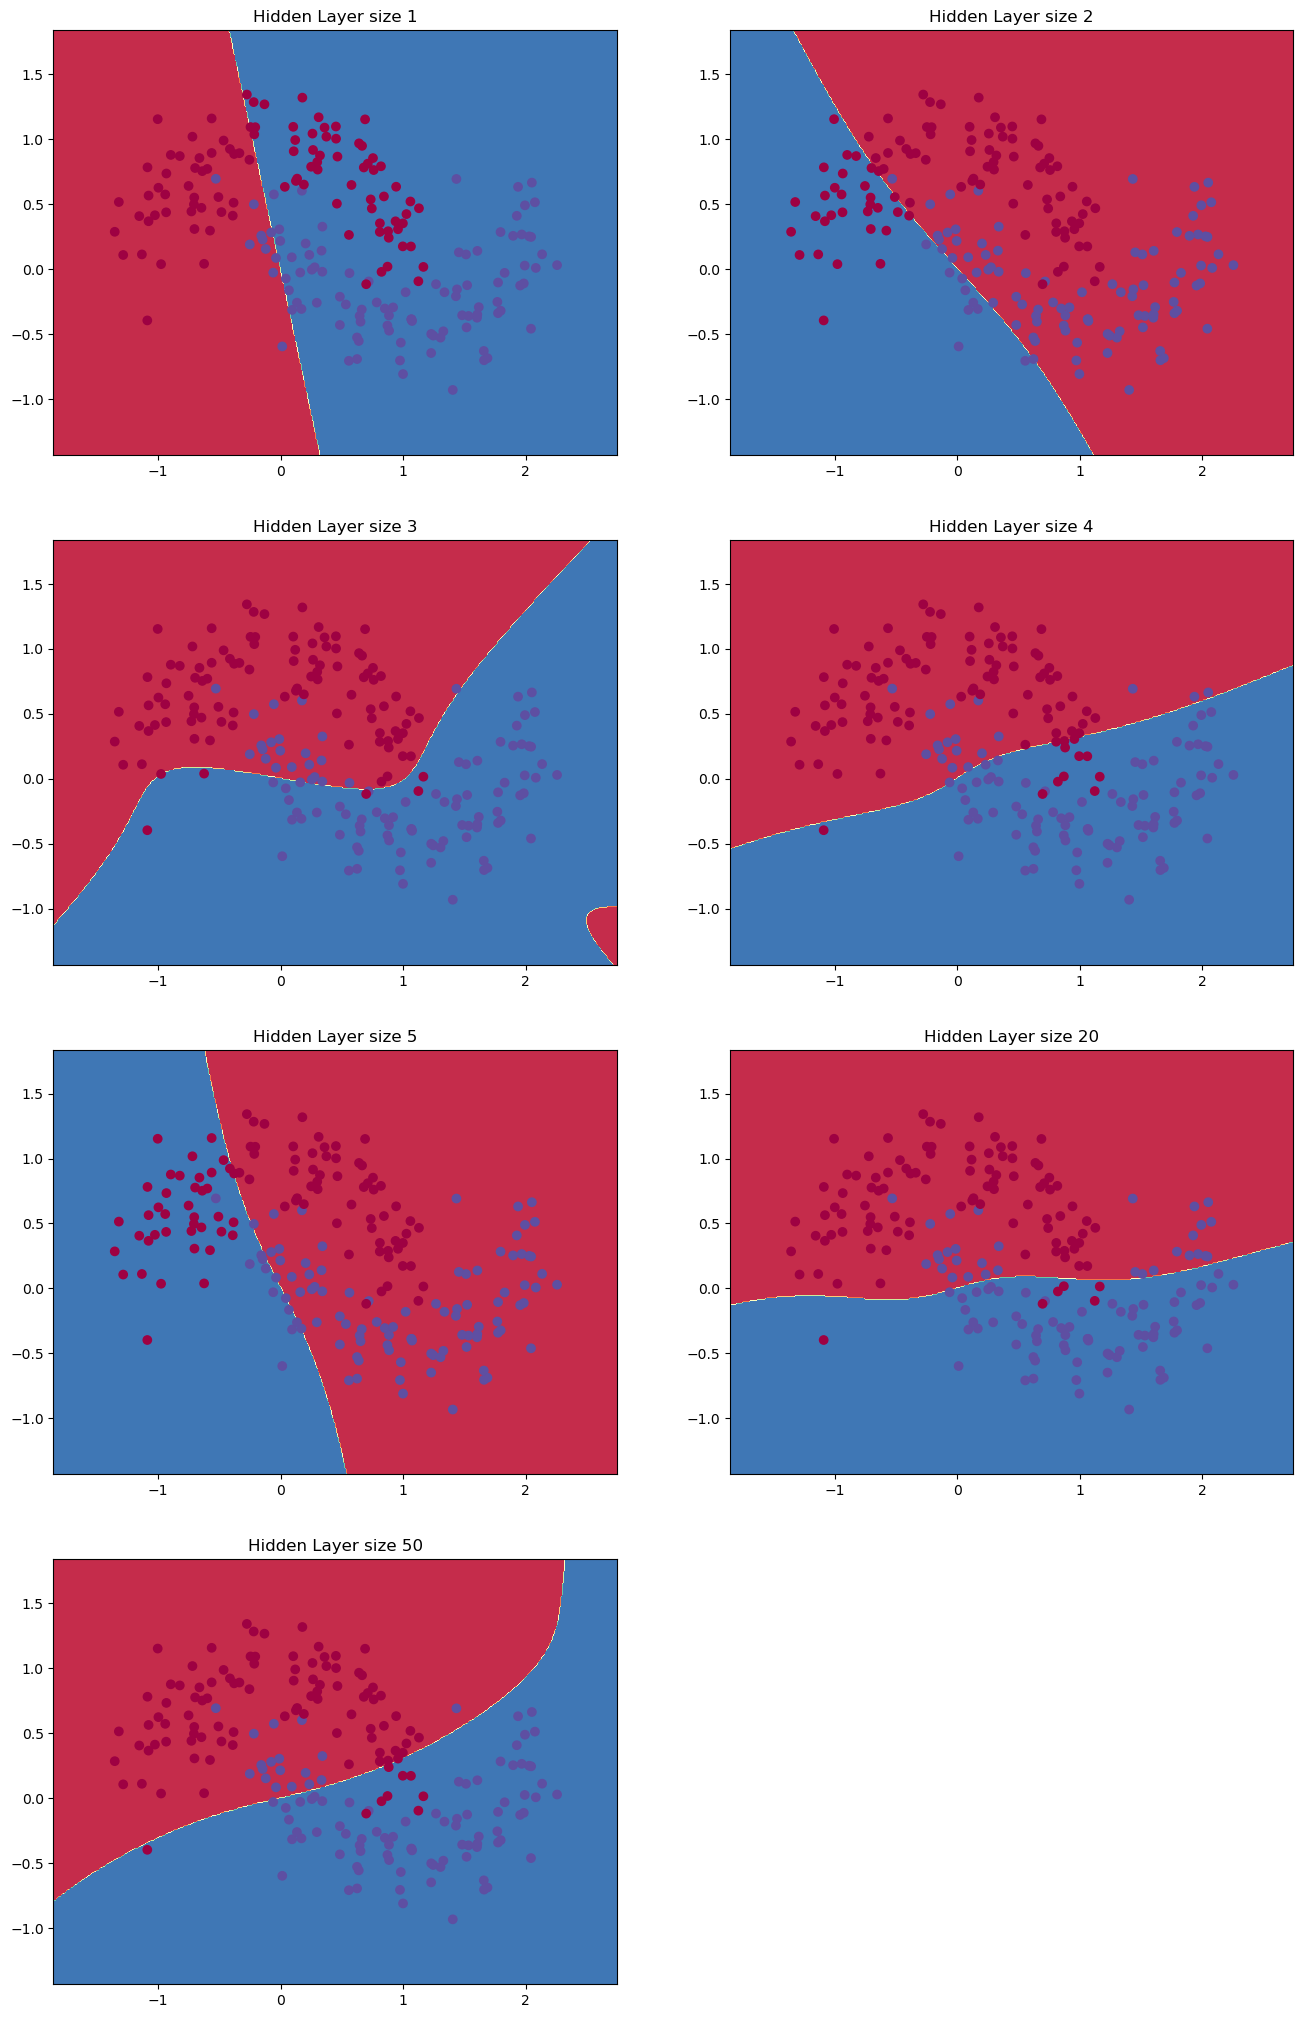

In [105]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: forward_pass(model, x))
plt.show()

## Part 03 -- Example illustrating the importance of[ learning rate](http://users.ics.aalto.fi/jhollmen/dippa/node22.html) in hyper-parameter tuning:

- Learning rate is a decreasing function of time.
- Two forms that are commonly used are:
    * 1) a linear function of time
    * 2) a function that is inversely proportional to the time t

### Create a noisier, more complex dataset:

In [106]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(20000, noise=0.5)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [107]:
linear_classifier = sklearn.linear_model.LogisticRegressionCV()
linear_classifier.fit(X, y)

LogisticRegressionCV()

In [108]:
plot_decision_boundary(lambda x: linear_classifier.predict(x))
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Logistic Regression')

In [109]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

In [110]:
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [111]:
model = build_model(5)
model = train_model(X, y, model, print_loss=True)

Loss after iteration 0: -0.133480
Loss after iteration 1000: 2.881623
Loss after iteration 2000: 2.406548
Loss after iteration 3000: 2.112103
Loss after iteration 4000: 2.035952
Loss after iteration 5000: 1.600093
Loss after iteration 6000: 1.282674
Loss after iteration 7000: 1.048510
Loss after iteration 8000: 0.785994
Loss after iteration 9000: 0.770481
Loss after iteration 10000: 0.502490
Loss after iteration 11000: 0.418204
Loss after iteration 12000: 0.367235
Loss after iteration 13000: 0.231056
Loss after iteration 14000: 0.181068
Loss after iteration 15000: 0.114358
Loss after iteration 16000: 0.014077
Loss after iteration 17000: -0.051066
Loss after iteration 18000: -0.086979
Loss after iteration 19000: -0.039099


### Plotting output of the model that failed to learn, given a set of hyper-parameters:

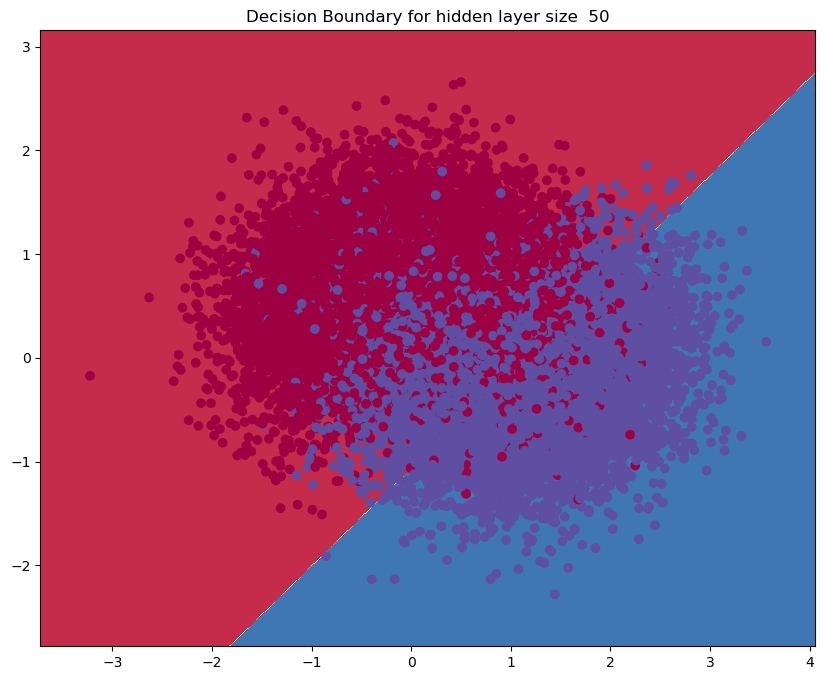

In [112]:
plot_decision_boundary(lambda x: forward_pass(model, x))
plt.title('Decision Boundary for hidden layer size  50')
plt.show()

### Adjusting the learning rate such that the neural network re-starts learning:

In [113]:
epsilon = 1e-6 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [114]:
model = build_model(5)
model = train_model(X, y, model, print_loss=True)

Loss after iteration 0: -0.270845
Loss after iteration 1000: -0.558951
Loss after iteration 2000: -0.559055
Loss after iteration 3000: -0.559298
Loss after iteration 4000: -0.560338
Loss after iteration 5000: -0.560753
Loss after iteration 6000: -0.561897
Loss after iteration 7000: -0.563075
Loss after iteration 8000: -0.564184
Loss after iteration 9000: -0.564877
Loss after iteration 10000: -0.564807
Loss after iteration 11000: -0.564772
Loss after iteration 12000: -0.565015
Loss after iteration 13000: -0.565222
Loss after iteration 14000: -0.565465
Loss after iteration 15000: -0.565569
Loss after iteration 16000: -0.565672
Loss after iteration 17000: -0.565776
Loss after iteration 18000: -0.566019
Loss after iteration 19000: -0.566157


### Plotting the decision boundary layer generated by an improved neural network model:

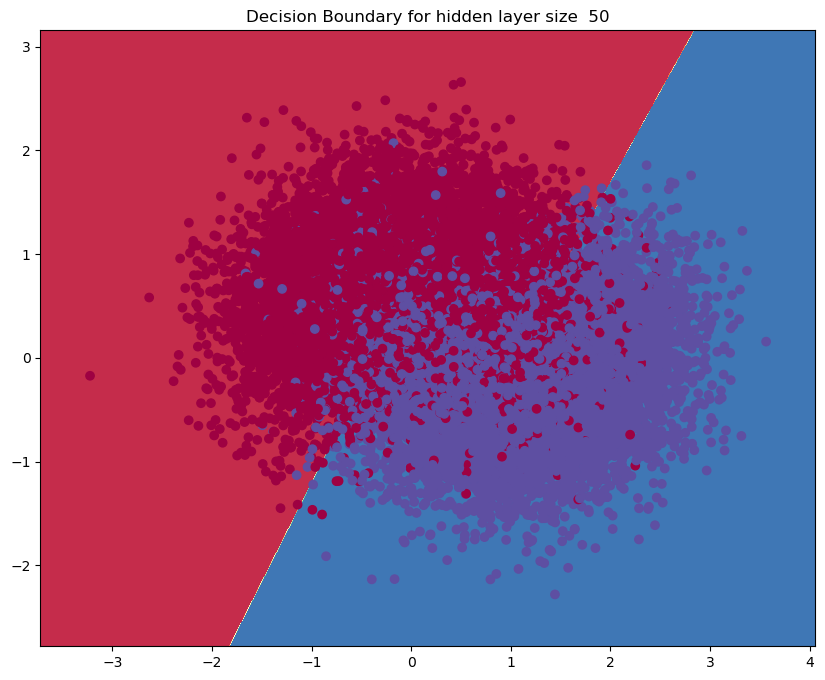

In [115]:
plot_decision_boundary(lambda x: forward_pass(model, x))
plt.title('Decision Boundary for hidden layer size  50')
plt.show()

## Part 04 -- Building a neural network using [tensorflow](https://www.tensorflow.org/):

- A neural network that predicts the y value given an x value.
- Implemented using tensorflow, an open-source deep-learning library.

### Import dependent libraries:

In [ ]:
import tensorflow as tf
import numpy as np

### Create a synthetic dataset for training and generating predictions:

In [ ]:
x_data = np.float32(np.random.rand(2,500))
y_data = np.dot([0.5, 0.7], x_data) + 0.6

- Variable objects store tensors in tensorflow.
- Tensorflow considers all input data tensors.
- Tensors are higher dimensional matrices.

### Constructing a linear model:

In [ ]:
bias = tf.Variable(tf.zeros([1]))
synapses = tf.Variable(tf.random.uniform([1, 2], -1, 1))

In [ ]:
@tf.function
def cost():
    y = tf.matmul(synapses, x_data) + bias
    return tf.reduce_mean(tf.square(y - y_data))

### Gradient descent optimizer:

- Imagine the valley with a ball.
- The goal of the optimizer is to localize the ball to the lowest point in the valley.
- Loss function will be reduced over the training.
- Mean squared error as the loss function.

In [ ]:
lr = 0.01

optimizer = tf.optimizers.RMSprop(lr)

### Training function:

- In tensorflow the computation is wrapped inside a graph.
- Tensorflow makes it easier to visualize the training sessions.

In [ ]:
train = optimizer.minimize(cost, var_list=[synapses, bias])

### Training the model:

In [ ]:
training_steps = 60000

for step in range (0, training_steps):
    train
    if step % 1000 == 0:
        print ('Current training session: ' + str(step) + str(synapses.numpy())+ str(bias.numpy()))

## Part 05 -- Neural net XOR gate solver using [Tensorflow](https://tensorflow.org) and [Keras](https://keras.io)

In [ ]:
import tensorflow.keras as keras
import numpy as np
import os

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
MODEL_PATH = './XOR_gate_keras_network.h5'

In [ ]:
! wget https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/weights/XOR_gate_keras_network.h5 -O XOR_gate_keras_network.h5

### Create input and output data

In [ ]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

### Create a neural network using [Keras Sequential API](https://keras.io/models/sequential/)

In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(2,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='relu'))

### Select optimizer

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

### Compile keras model

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Load model weights

In [ ]:
if os.path.exists(MODEL_PATH):
    model.load_weights(MODEL_PATH)

### Summarize keras model

In [ ]:
model.summary()

### Visualize model architecture

In [ ]:
%%capture
! apt-get install -y graphviz libgraphviz-dev && pip3 install pydot graphviz

In [ ]:
from keras.utils import plot_model
import pydot
import graphviz # apt-get install -y graphviz libgraphviz-dev && pip3 install pydot graphviz
from IPython.display import SVG
try:
    from keras.utils.vis_utils import model_to_dot
except ModuleNotFoundError:
    from keras.utils import model_to_dot


In [ ]:
output_dir = './'
plot_model(model, to_file= output_dir + '/model_summary_plot.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Train model

In [ ]:
model.fit(x, y, batch_size=4,epochs=1000)

### Save model weights

In [ ]:
model.save_weights(MODEL_PATH)

In [ ]:
model.predict(x)

In [ ]:
from google.colab import files
files.download(MODEL_PATH)

## Extra credit --[ Activation functions in numpy](https://codereview.stackexchange.com/questions/132023/different-neural-network-activation-functions-and-gradient-descent):

In [ ]:
import numpy as np

def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def tanh(x, derivative=False):
    if derivative:
        return (1 - (np.power(x, 2)))
    return np.tanh(x)

def relu(x, derivative=False):
    if derivative:
        return np.where(x < 0, 0, 1)
    x_relu = np.maximum(x, 0)
    return x_relu

def arctan(x, derivative=False):
    if derivative:
        return (np.cos(x) ** 2)
    return np.arctan(x)

def step(x, derivative=False):
    if derivative:
        return x
    return np.where(x < 0, 0, 1)

# def squash(x, derivative=False):
#     if derivative:
#         for i in range(0, len(x)):
#             for k in range(0, len(x[i])):
#                 if x[i][k] > 0:
#                     x[i][k] = (x[i][k]) / (1 + x[i][k])
#                 else:
#                     x[i][k] = (x[i][k]) / (1 - x[i][k])
#         return x
#     return x / (1 + np.abs(x))

def gaussian(x, derivative=False):
    if derivative:
        return -2 * x * np.exp(-np.power(x, 2))
    return np.exp(-np.power(x, 2))

## Concluding notes -- Frank Rosenblatt, connectionism and the Perceptron:

![Frank Rosenblatt and the Perceptron](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/Frank_Rosenblatt's_Mark_I_Perceptron__Cornell_Aeronautical_Laboratory__Buffalo__New%20York.jpg)

#### Image 1: Frank Rosenblatt working on his Mark 1 Perceptron at Cornell Aeronautical Laboratory in Buffalo, New York, circa 1960.

This notebook is created to coincide the 90th birth anniversary of pioneering psychologist and artificial intelligence researcher, Frank Rosenblatt, born July 11, 1928 – died July 11, 1971. He is known for his work on connectionism, the incredible Mark 1 Perceptron. This notebook aims to remember the promise, the controversy and the resurgence of connectionism and neural networks as a tool in artificial intelligence.

[Here is a brief biography of Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) (Via Wikipedia):

Frank Rosenblatt was born in New Rochelle, New York as son of Dr. Frank and Katherine Rosenblatt. After graduating from The Bronx High School of Science in 1946, he attended Cornell University, where he obtained his A.B. in 1950 and his Ph.D. in 1956.

He then went to Cornell Aeronautical Laboratory in Buffalo, New York, where he was successively a research psychologist, senior psychologist, and head of the cognitive systems section. This is also where he conducted the early work on perceptrons, which culminated in the development and hardware construction of the Mark I Perceptron in 1960. This was essentially the first computer that could learn new skills by trial and error, using a type of neural network that simulates human thought processes.

Rosenblatt’s research interests were exceptionally broad. In 1959 he went to Cornell’s Ithaca campus as director of the Cognitive Systems Research Program and also as a lecturer in the Psychology Department. In 1966 he joined the Section of Neurobiology and Behavior within the newly formed Division of Biological Sciences, as associate professor. Also in 1966, he became fascinated with the transfer of learned behavior from trained to naive rats by the injection of brain extracts, a subject on which he would publish extensively in later years.

In 1970 he became field representative for the Graduate Field of Neurobiology and Behavior, and in 1971 he shared the acting chairmanship of the Section of Neurobiology and Behavior. Frank Rosenblatt died in July 1971 on his 43rd birthday, in a boating accident in Chesapeake Bay.

![Mark 1 Perceptron](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/Smithsonian_Perceptron.jpg)

#### Image 2: Mark 1 Perceptron at Smithsonian Institute, Washington DC